In [2]:
from scipy.stats import weibull_min

z1, z2 = weibull_min.ppf([1/3, 2/3], c=1)
print(z1, z2)

0.4054651081081643 1.0986122886681096


In [3]:
import numpy as np
X = weibull_min.rvs(c=1, size=30, random_state=42)
X = np.sort(X)

n1 = np.count_nonzero(X < z1)
n2 = np.count_nonzero((z1 <= X) & (X < z2))
n3 = np.count_nonzero(z2 <= X)
obs_freq = np.array([n1, n2, n3])
obs_freq

array([13, 10,  7])

In [ ]:
exp_freq = 10
K = np.sum((obs_freq - exp_freq)**2) / exp_freq # К наблюдаемое (значение Пирсона)
print(K)

1.8


In [5]:
alpha=0.1
from scipy.stats import chi2
k_c = chi2.isf(alpha, df=2)
print(k_c)

4.605170185988092


<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
C:\Users\normist\AppData\Local\Temp\ipykernel_18532\1366494830.py:14: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('cdf $\chi^2$')


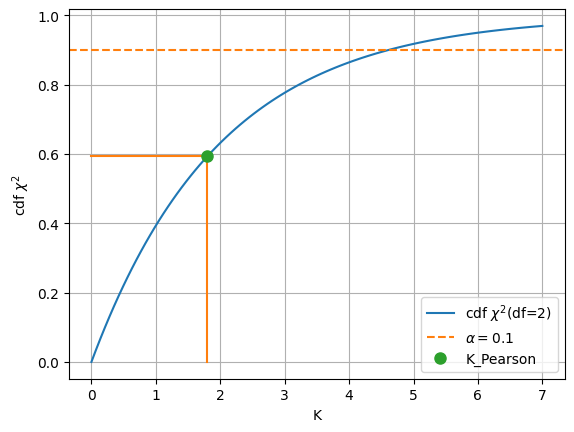

In [ ]:
from matplotlib import pyplot as plt

xx = np.linspace(0, 7, 101)
plt.plot(xx, chi2.cdf(xx, df=2), # Функция распредления
label=r"cdf $\chi^2$(df=2)")
alpha = 0.1
plt.axhline(y=1-alpha, ls='--',
label=r"$\alpha = %s$"%alpha, color='C1')
plt.plot([K, K, 0],
[0, chi2.cdf(K, df=2), chi2.cdf(K, df=2)], '-')
plt.plot(K, chi2.cdf(K, df=2), 'o', ms=8, label='K_Pearson')
plt.legend(loc='best')
plt.xlabel('K')
plt.ylabel('cdf $\chi^2$')
plt.grid()

In [ ]:
from scipy.stats import chisquare
statistic, pvalue = chisquare(obs_freq, [exp_freq]*3)
print(statistic, pvalue) # K и p-value

1.8 0.4065696597405992


In [ ]:
chi2.sf(K, df=2) # Вероятность превышения K

0.4065696597405992